In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

## 分析の概要と目的
data1は駅前に店舗を構えている洋菓子チェーン店の売上高`Sales`(万円/月)と,それぞれの駅の平均乗降客数`Passengers`(十人/日)のデータである.平均乗降客数を独立変数,売上高を従属変数として単回帰分析を行い,平均乗降客数が売上高に与える影響を検討することを目的とする.

In [27]:
# read data
df = pd.read_csv("data1.csv")
df

,Sales,Passengers
0,130,148
1,195,186
2,218,279
3,166,179
4,163,216
5,155,127
6,204,152
7,270,196
8,205,126
9,127,78


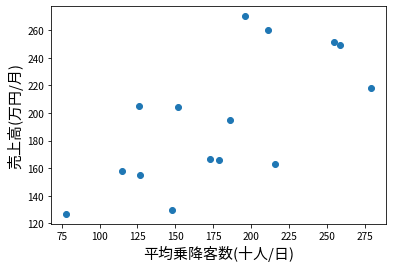

In [28]:
# plot data
plt.figure(facecolor="white")
plt.scatter(df["Passengers"],df["Sales"])
plt.xlabel("平均乗降客数(十人/日)",fontsize=15)
plt.ylabel("売上高(万円/月)",fontsize=15)
plt.show()

## scikit-learnを用いた回帰分析
scikit-learn(機械学習のライブラリ)を用いて回帰方程式と決定係数,さらにmatplotlibと組み合わせることで回帰直線の可視化ができる.

In [29]:
from sklearn.linear_model import LinearRegression

X = df["Passengers"].to_numpy().reshape(-1,1)
y = df["Sales"].to_numpy().reshape(-1,1)
model = LinearRegression()
model.fit(X,y)
print('回帰方程式 y = %.2fx + %.2f' % (model.coef_ , model.intercept_))
print("決定係数 %lf"%(model.score(X,y)))

回帰方程式 y = 0.56x + 94.59
決定係数 0.460643


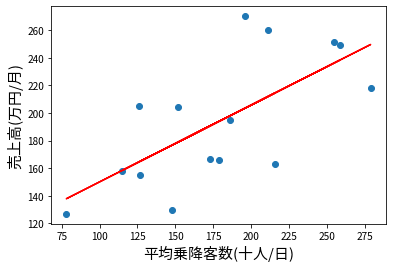

In [30]:
# plot data
plt.figure(facecolor="white")
plt.scatter(df["Passengers"],df["Sales"])
plt.plot(X,model.predict(X),c="red")
plt.xlabel("平均乗降客数(十人/日)",fontsize=15)
plt.ylabel("売上高(万円/月)",fontsize=15)
plt.show()

## statsmodelsを用いた回帰分析
scikit-learnでは回帰方程式,決定係数しか計算できないが,statsmodelsを用いると詳細な回帰分析を行うことができる.
実行結果の取得方法については次を参照:   https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

In [31]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     11.10
Date:                Wed, 17 Feb 2021   Prob (F-statistic):            0.00540
Time:                        09:08:50   Log-Likelihood:                -73.925
No. Observations:                  15   AIC:                             151.8
Df Residuals:                      13   BIC:                             153.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.5850     31.396      3.013      0.0

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 説明力の統計的検定
回帰式の説明力が統計的に有意か検定する.これを行う理由は求めたモデルがある程度説明力を持っているとしても,標本が少ないという理由などで母集団の推測にとって有意でないことがあり得るからである.
ここでは説明力が0ではない,つまり決定係数$R^2\neq 0$といってよいかという検定を行う.検定には次に示す方法で算出したF値を検定統計量として利用する.

$$ 
F = \frac{(n-2) R^2}{(1-R^2)}
$$

今の例では,サンプルサイズが15,決定係数$R^2=0.461$だからF値は次に示すように11.11になる.statsmodelsの実行結果で表示されるF値からも11.10であるであることが読み取れる.
$$ 
F = \frac{(15-2)\times 0.461}{(1-0.461)} = 11.11
$$

F値からP値を求め,回帰式が統計的に有意かどうか検討する.P値は次に示すコードで求めることができる.今の例ではP値は0.0054になる.この値はstatsmodelsのProb (F-statistic):からも確認できる.これはF値が偶然に出現する確率が0.54%程度しかないことを示している.したがって,有意水準を5%とすると,この回帰式は十分統計的に有意であり,母集団についてもこの回帰式で物事を考えることに統計的な意味があると認められる.

```Python
results.f_pvalue
```

In [37]:
results.f_pvalue

0.005403727481134

## 結果の解釈
- 回帰式は売上高=94.5850+0.5553×平均乗降客数である.
- F値は11.10であり有意確率は0.0054で有意である.したがって,母集団を推測するモデルとして,このモデルは統計的な意味が認められる.
- 自由度調整済み決定係数が0.419であるから,求めた回帰式で約41.9%データを説明することができる.